<a href="https://colab.research.google.com/github/binhvd/Data-Analytics-3-Labs/blob/main/5_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Import libraries
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.utils import np_utils
from keras import regularizers

# Settings

In [ ]:
# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.2
# boundary of the graph
GRID_PADDING = 0.5
GRID_STEP = 0.01
# number of iterations of the neural network
N_EPOCHS = 300

# Build the Dataset

To demonstrate the phenomenon of overfitting, we only sampled 1000
samples, and added Gaussian noise with a standard deviation of 0.25 as in
the following:

In [ ]:
# Randomly choose 1000 samples, and split them into training and testing sets
X, y = make_moons(n_samples = N_SAMPLES, noise=0.25, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=42)

In [ ]:
x_min, x_max = X[:, 0].min() - GRID_PADDING, X[:, 0].max() + GRID_PADDING
y_min, y_max = X[:, 1].min() - GRID_PADDING, X[:, 1].max() + GRID_PADDING
XX, YY = np.meshgrid(np.arange(x_min, x_max, GRID_STEP), np.arange(y_min, y_max, GRID_STEP))

The make_plot function can easily draw the distribution map of
the data according to the coordinate X of the sample and the label y of
the sample:

In [ ]:
def make_plot(X, y, plot_name=None, XX=None, YY=None, preds=None):
    plt.figure(figsize=(10,10))    
    axes = plt.gca()
    axes.set_xlim([x_min,x_max])
    axes.set_ylim([y_min,y_max])
    
    axes.set(xlabel="$x_1$", ylabel="$x_2$")
    if plot_name is not None:
        plt.title(plot_name, fontsize=30)

    # Plot prediction surface
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 0.08, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    
    # Plot samples
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    plt.show()

Draw the distribution of 1000 samples for sampling. The red square points are one category, and the blue circles are
another category.

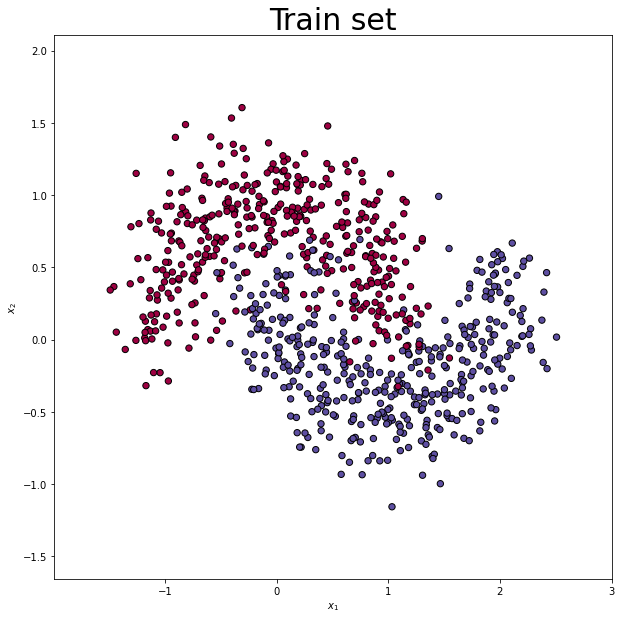

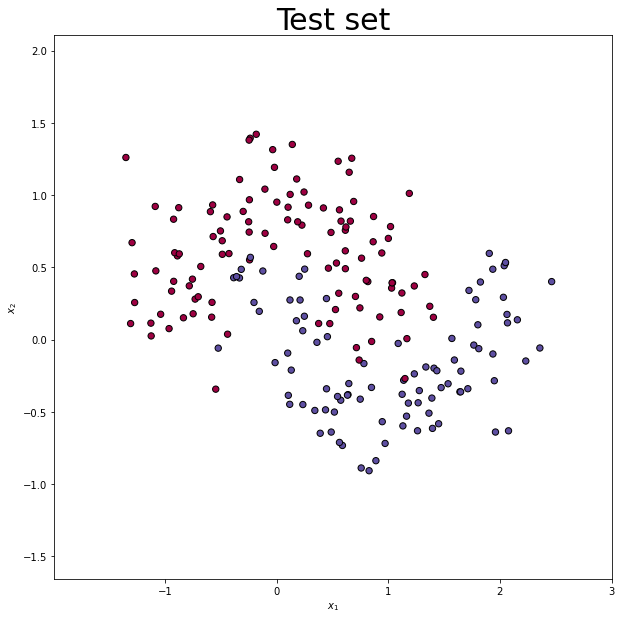

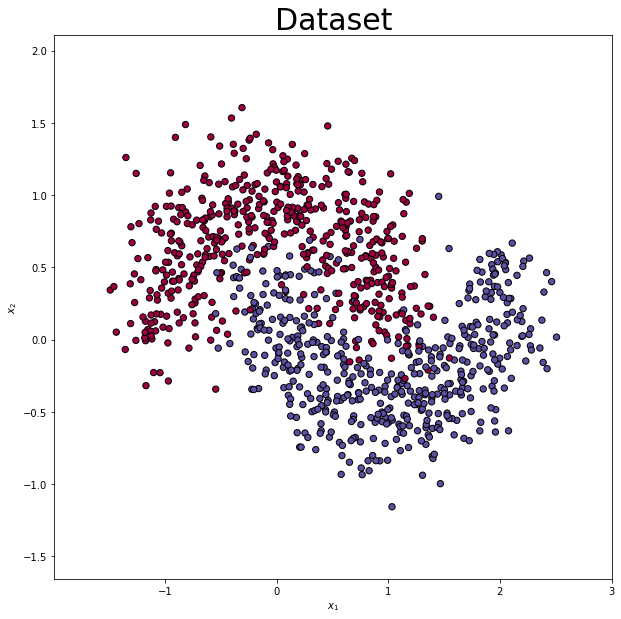

In [ ]:
# Plot data points
make_plot(X_train, y_train, "Train set")
make_plot(X_test, y_test, "Test set")
make_plot(X, y, "Dataset")

# Influence of the Number of Network Layers
In order to explore the degree of overfitting at different network depths, we
conducted a total of five training experiments. When n ∈ [0, 4], build a fully
connected layer network with n + 2 layers, and train 300 Epochs through
the Adam optimizer to obtain the separation curve of the network on the
training set.

In [ ]:
def train_evaluate_plot(model, label):
    # Train model
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)

    # Check network performance
    score, acc = model.evaluate(X_test, y_test, verbose = 0)
    print('Test accuracy:', acc)
    
    # Plot boundaries for different network
    preds = (model.predict(np.c_[XX.ravel(), YY.ravel()]) > 0.5).astype("int32")
    make_plot(X_train, y_train, label, XX, YY, preds)

In [ ]:
def build_layers(layer_number):
    model = Sequential()
    
    # Create 1st layer
    model.add(Dense(8, input_dim=2,activation='relu'))
    
    # TODO: Add layer_number of hidden layer with 32 units
    ...
    
    model.add(Dense(1, activation='sigmoid')) # Add output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Configure and train
    
    train_evaluate_plot(model, "Hidden layer ({})". format(layer_number))

In [ ]:
for n in range(5): # Create 5 different network with different layers
    build_layers(n)

# Impact of Dropout

In order to explore the impact of the Dropout layer on network training, we
conducted a total of five experiments. Each experiment used a seven-layer
fully connected layer network for training, but inserted 0~4 Dropout layers
in the fully connected layer at intervals.

In [ ]:
def build_dropout(dropout_number):
    model = Sequential()

    # Create 1st layer
    model.add(Dense(8, input_dim=2,activation='relu'))

    # TODO: Add 5 hidden layers with 64 units but only a dropout_number of Dropout layer with a rate of 0.5
    ...

    model.add(Dense(1, activation='sigmoid')) # Output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Configure and train

    train_evaluate_plot(model, "Dropout ({})". format(dropout_number))

In [ ]:
for n in range(5): # Create 5 different networks with different number of Dropout layers
    build_dropout(n)

# Impact of Regularization
In order to explore the influence of regularization coefficients on network
model training, we adopted the L2 regularization method to construct
a five-layer neural network, in which the weight tensor W of the second,
third, and fourth neural network layers are added with L2 regularization
constraints terms as follows:

In [ ]:
def build_model_with_regularization(_lambda):
    # Create networks with regularization terms
    model = Sequential()

    model.add(Dense(8, input_dim=2,activation='relu')) # without regularization

    # TODO: Add 3 hidden layers with 256 units with L2 regularization with _lambda as input
    ...

    # Output
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Configure and train
    return model

The plot_weights_matrix code of the matrix 3D plot function is as
follows:

In [ ]:
def plot_weights_matrix(model, layer_index, plot_name):
    # Plot weight ranges
    # Get weights for certain layers
    weights = model.layers[layer_index].get_weights()[0]

    # Get minimum, maximum and mean values
    min_val = round(weights.min(), 4)
    max_val = round(weights.max(), 4)
    mean_val = round(weights.mean(), 4)
    shape = weights.shape

    # Generate grids
    X = np.array(range(shape[1]))
    Y = np.array(range(shape[0]))
    X, Y = np.meshgrid(X, Y)
    print(plot_name, min_val, max_val, mean_val)

    # Plot 3D figures
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Plot weight ranges
    surf = ax.plot_surface(X, Y, weights, cmap=plt.get_cmap('rainbow'), linewidth=0)
    ax.set_xlabel('x', fontsize=16, rotation = 0)
    ax.set_ylabel('y', fontsize=16, rotation = 0)
    ax.set_zlabel('weight', fontsize=16, rotation = 90)
    plt.show()

Under the condition of keeping the network structure unchanged,
we adjust the regularization coefficient λ = 0.00001, 0.001, 0.1, 0.12, 0.13
to test the training effect of the network and draw the decision boundary
curve of the learning model on the training set.

In [ ]:
for _lambda in [1e-5,1e-3,1e-1,0.12,0.13]:
    # Create model with regularization term
    model = build_model_with_regularization(_lambda)
    
    # Train model
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)

    # Check network performance
    score, acc = model.evaluate(X_test, y_test, verbose = 0)
    print('Test accuracy:', acc)
    
    # Plot weight range
    layer_index = 2
    plot_title = "Regularization-[lambda = {}]".format(str(_lambda))

    # Plot weight ranges
    plot_weights_matrix(model, layer_index, plot_title)
    
    # Plot decision boundaries
    preds = (model.predict(np.c_[XX.ravel(), YY.ravel()]) > 0.5).astype("int32")
    make_plot(X_train, y_train, plot_title, XX, YY, preds)